In [1]:
pip install pandas matplotlib seaborn scipy scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os

from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

warnings.filterwarnings("ignore")

In [3]:
import pandas as pd

df = pd.read_csv('games.csv')
print(df.head())

                    name  release_date  required_age  price  dlc_count  \
0       Galactic Bowling  Oct 21, 2008             0  19.99          0   
1           Train Bandit  Oct 12, 2017             0   0.99          0   
2           Jolt Project  Nov 17, 2021             0   4.99          0   
3               Henosis™  Jul 23, 2020             0   5.99          0   
4  Two Weeks in Painland   Feb 3, 2020             0   0.00          0   

                                detailed_description  \
0  Galactic Bowling is an exaggerated and stylize...   
1  THE LAW!! Looks to be a showdown atop a train....   
2  Jolt Project: The army now has a new robotics ...   
3  HENOSIS™ is a mysterious 2D Platform Puzzler w...   
4  ABOUT THE GAME Play as a hacker who has arrang...   

                                      about_the_game  \
0  Galactic Bowling is an exaggerated and stylize...   
1  THE LAW!! Looks to be a showdown atop a train....   
2  Jolt Project: The army now has a new robotics .

In [4]:
video_games_filtered_df = df[['name', 'release_date', 'price', 'short_description' , 'windows','mac','linux','metacritic_score', 'supported_languages','developers','publishers','categories','genres','tags']]
video_games_filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97410 entries, 0 to 97409
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   name                 97404 non-null  object 
 1   release_date         97410 non-null  object 
 2   price                97410 non-null  float64
 3   short_description    92631 non-null  object 
 4   windows              97410 non-null  bool   
 5   mac                  97410 non-null  bool   
 6   linux                97410 non-null  bool   
 7   metacritic_score     97410 non-null  int64  
 8   supported_languages  97410 non-null  object 
 9   developers           97410 non-null  object 
 10  publishers           97410 non-null  object 
 11  categories           97410 non-null  object 
 12  genres               97410 non-null  object 
 13  tags                 97410 non-null  object 
dtypes: bool(3), float64(1), int64(1), object(9)
memory usage: 8.5+ MB


# Exploratory Data Analysis

In [5]:
# Check for missing values for name, tags
missing_values = video_games_filtered_df[['name', 'tags']].isnull().sum()
print(missing_values)

# Drop missing values
video_games_filtered_df = video_games_filtered_df.dropna(subset=['name', 'tags'])

name    6
tags    0
dtype: int64


<Axes: >

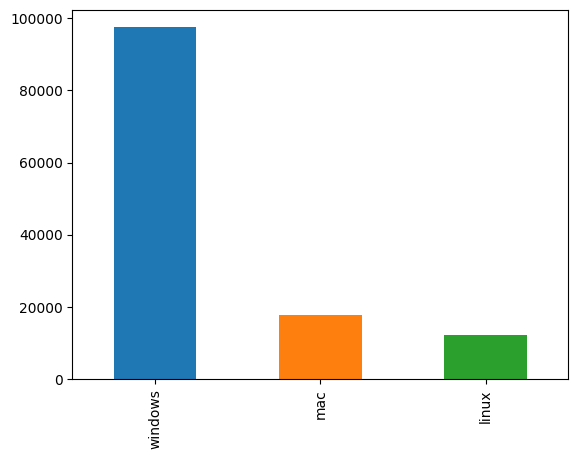

In [6]:
# Examine the frequency of data types for each categorical feature: Genre, Platform, and Rating.
# for platform (windows,linux,mac)
platform = video_games_filtered_df[['windows','mac','linux']]
# plot how many for each platform
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']
platform.sum().plot(kind='bar', color=colors)


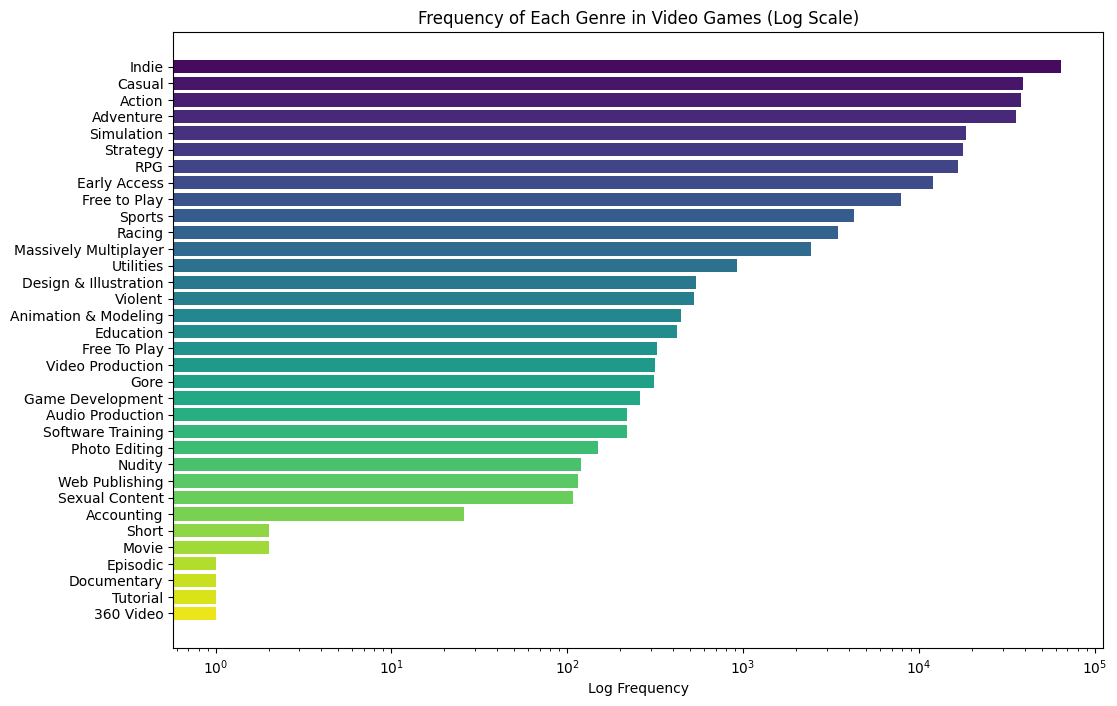

In [7]:
import pandas as pd
import ast
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

genre_count = {}

# Iterate through each row in the DataFrame
for genres in video_games_filtered_df['genres']:
    # Convert the string representation of the list to an actual list
    genres_list = ast.literal_eval(genres)
    for genre in genres_list:
        if genre in genre_count:
            genre_count[genre] += 1
        else:
            genre_count[genre] = 1

# Convert the dictionary to a DataFrame for easier plotting
genre_count_df = pd.DataFrame(list(genre_count.items()), columns=['Genre', 'Frequency'])

# Sort the DataFrame by frequency in descending order
genre_count_df = genre_count_df.sort_values(by='Frequency', ascending=False)

# Set a color palette using Seaborn
palette = sns.color_palette("viridis", len(genre_count_df))

# Plot the bar chart with the new color palette and log scale on the x-axis
plt.figure(figsize=(12, 8))
bars = plt.barh(genre_count_df['Genre'], genre_count_df['Frequency'], color=palette)
plt.xscale('log')  # Set the x-axis to a logarithmic scale
plt.xlabel('Log Frequency')
plt.title('Frequency of Each Genre in Video Games (Log Scale)')
plt.gca().invert_yaxis()  # To have the highest frequency at the top
plt.show()


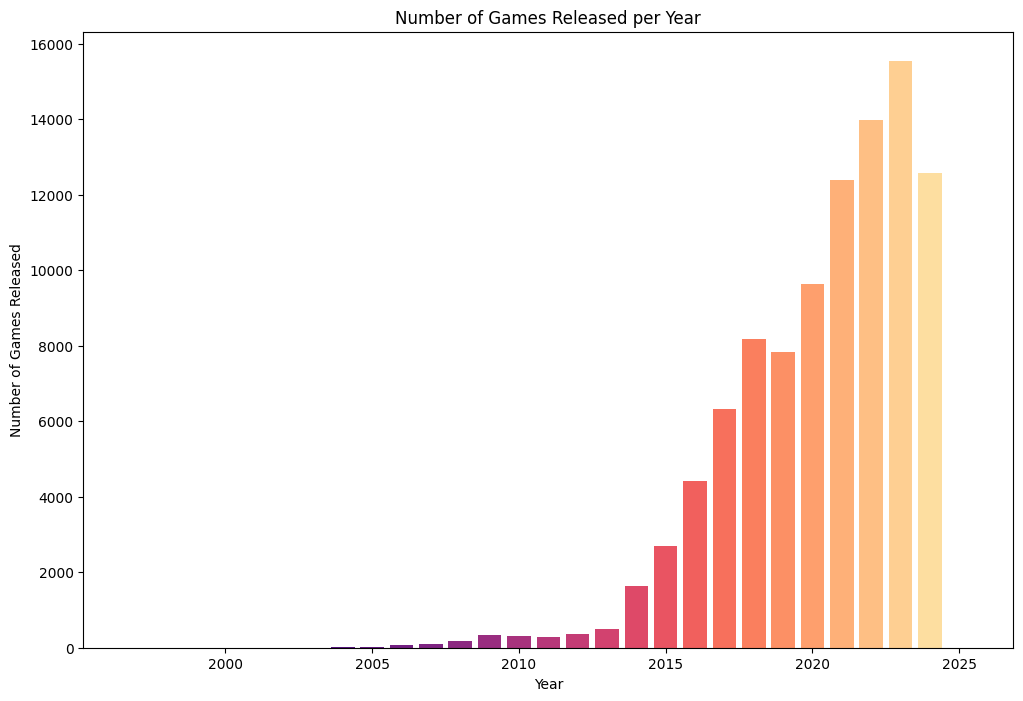

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have loaded your dataset into a DataFrame called video_games_filtered_df
# Example:
# video_games_filtered_df = pd.read_csv('path_to_your_dataset.csv')

# Extract the year using the last 4 characters from the 'release_date' column
video_games_filtered_df['release_year'] = video_games_filtered_df['release_date'].str[-4:].astype(int)

# Calculate the frequency of each year
release_year_count = video_games_filtered_df['release_year'].value_counts().sort_index()

# Set a color palette using Seaborn
palette = sns.color_palette("magma", len(release_year_count))

# Plot the bar chart with the new color palette
plt.figure(figsize=(12, 8))
plt.bar(release_year_count.index, release_year_count.values, color=palette)
plt.xlabel('Year')
plt.ylabel('Number of Games Released')
plt.title('Number of Games Released per Year')
plt.show()


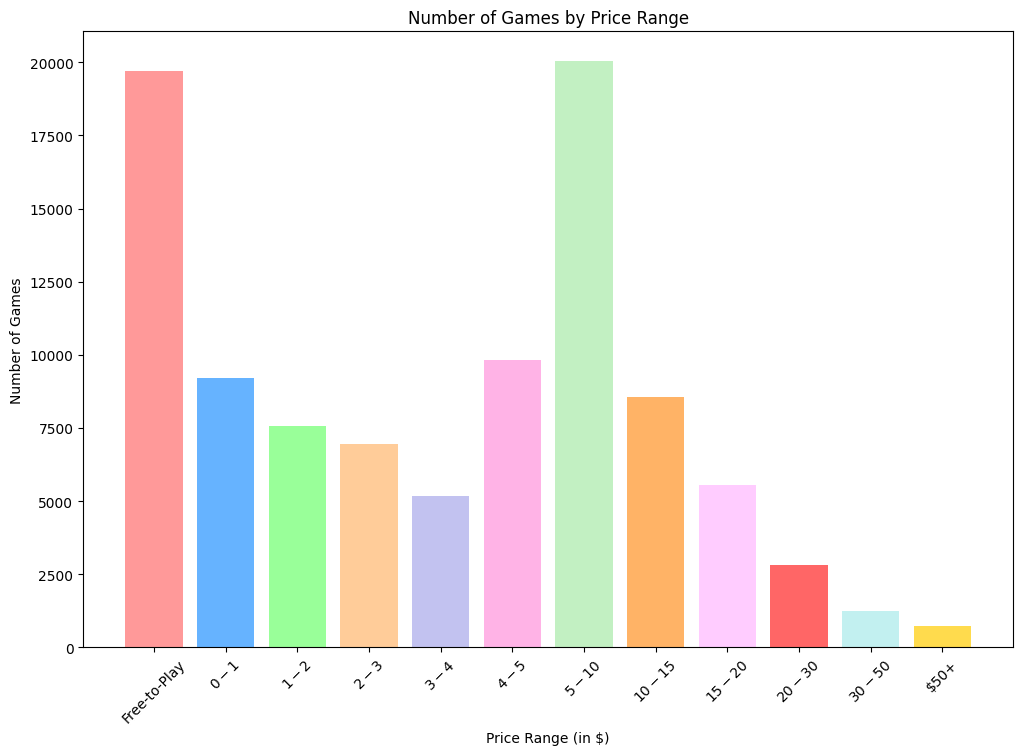

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Initialize a dictionary to hold the price range counts
price_ranges = {
    'Free-to-Play': 0,
    '$0-$1': 0,
    '$1-$2': 0,
    '$2-$3': 0,
    '$3-$4': 0,
    '$4-$5': 0,
    '$5-$10': 0,
    '$10-$15': 0,
    '$15-$20': 0,
    '$20-$30': 0,
    '$30-$50': 0,
    '$50+': 0,
}

# Iterate through the DataFrame to categorize the prices
for index, row in video_games_filtered_df.iterrows():
    price = row['price']
    if price == 0.0:
        price_ranges['Free-to-Play'] += 1
    elif price < 1:
        price_ranges['$0-$1'] += 1
    elif price < 2:
        price_ranges['$1-$2'] += 1
    elif price < 3:
        price_ranges['$2-$3'] += 1
    elif price < 4:
        price_ranges['$3-$4'] += 1
    elif price < 5:
        price_ranges['$4-$5'] += 1
    elif price < 10:
        price_ranges['$5-$10'] += 1
    elif price < 15:
        price_ranges['$10-$15'] += 1
    elif price < 20:
        price_ranges['$15-$20'] += 1
    elif price < 30:
        price_ranges['$20-$30'] += 1
    elif price < 50:
        price_ranges['$30-$50'] += 1
    else:
        price_ranges['$50+'] += 1

# Convert the dictionary to a DataFrame for plotting
price_ranges_df = pd.DataFrame(list(price_ranges.items()), columns=['Price Range', 'Number of Games'])

# Set the color palette
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0','#ffb3e6','#c2f0c2','#ffb366',
          '#ffccff','#ff6666','#c2f0f0','#ffdb4d']

# Plotting the results
plt.figure(figsize=(12, 8))
plt.bar(price_ranges_df['Price Range'], price_ranges_df['Number of Games'], color=colors)
plt.xlabel('Price Range (in $)')
plt.ylabel('Number of Games')
plt.title('Number of Games by Price Range')
plt.xticks(rotation=45)
plt.show()


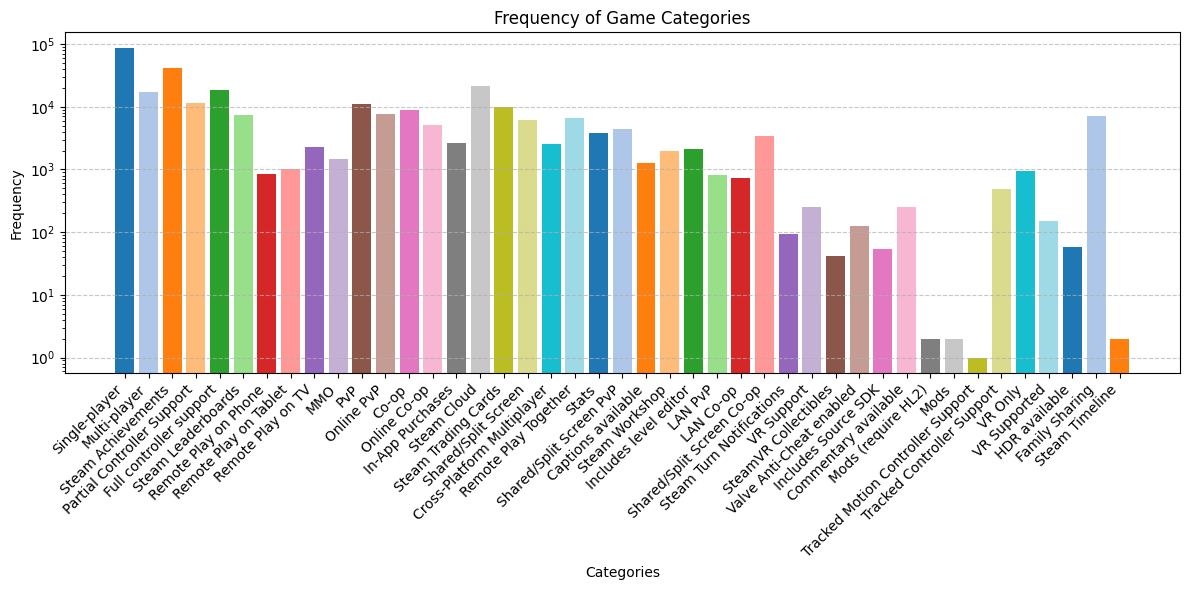

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

# Assuming you have your DataFrame as video_games_filtered_df
# Sample DataFrame creation
# video_games_filtered_df = pd.read_csv("your_dataset.csv")  # Load your dataset

# Step 1: Count frequency of each category
category_counts = Counter()

# Iterate through each entry in the 'categories' column
for categories in video_games_filtered_df['categories']:
    for category in eval(categories):  # Convert string representation of list to list
        category_counts[category] += 1

# Step 2: Create a DataFrame for the frequencies
category_freq_df = pd.DataFrame(category_counts.items(), columns=['Category', 'Frequency'])

# Step 3: Plot the frequencies
plt.figure(figsize=(12, 6))
plt.bar(category_freq_df['Category'], category_freq_df['Frequency'], color=plt.cm.tab20.colors)
plt.xticks(rotation=45, ha='right')
plt.title('Frequency of Game Categories')
plt.xlabel('Categories')
plt.ylabel('Frequency')
plt.yscale('log')  # Log scale for better visualization
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()  # Adjust layout to make room for x-axis labels
plt.show()


In [11]:
video_games_filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 97404 entries, 0 to 97409
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   name                 97404 non-null  object 
 1   release_date         97404 non-null  object 
 2   price                97404 non-null  float64
 3   short_description    92630 non-null  object 
 4   windows              97404 non-null  bool   
 5   mac                  97404 non-null  bool   
 6   linux                97404 non-null  bool   
 7   metacritic_score     97404 non-null  int64  
 8   supported_languages  97404 non-null  object 
 9   developers           97404 non-null  object 
 10  publishers           97404 non-null  object 
 11  categories           97404 non-null  object 
 12  genres               97404 non-null  object 
 13  tags                 97404 non-null  object 
 14  release_year         97404 non-null  int64  
dtypes: bool(3), float64(1), int64(2), object(

# Getting reviews from https://opencritic.com/browse/all/all-time/date


# Making Model
The machine learning algorithm NearestNeighbors will be utilized to identify the data points nearest to a given input, with the aid of the cosine similarity measurement to determine the similarity or dissimilarity between data points.

In [12]:
import pandas as pd
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

features = video_games_filtered_df[['genres', 'release_year', 'price']]

# Step 2: One-Hot Encoding for genres
# One-hot encode the 'genres' column
ohe = OneHotEncoder(sparse_output=False)
encoded_genres = ohe.fit_transform(features[['genres']].apply(lambda x: x.str.join(',')).str.get_dummies(sep=','))
encoded_genres_df = pd.DataFrame(encoded_genres, columns=ohe.get_feature_names_out(['genres']))

# Combine with the original DataFrame
features = features.drop('genres', axis=1)
features = pd.concat([features.reset_index(drop=True), encoded_genres_df.reset_index(drop=True)], axis=1)

AttributeError: 'DataFrame' object has no attribute 'str'

In [ ]:
# Step 3: Create and fit the model
model = NearestNeighbors(metric='cosine', algorithm='brute')
model.fit(features)

# Step 4: Make recommendations
def get_recommendations(game_name, n=5):
    game_index = video_games_filtered_df.index[video_games_filtered_df['name'] == game_name][0]
    distances, indices = model.kneighbors(features.iloc[game_index].values.reshape(1, -1), n_neighbors=n)
    recommended_games = video_games_filtered_df.iloc[indices.flatten()]
    return recommended_games[['name', 'release_year', 'price']]

In [ ]:
# Example usage
recommended_games = get_recommendations("Galactic Bowling")
print(recommended_games)